# Pandas Day 7

# Understanding & Exploring Data

## Dataset Overview

- Understanding the structure of the dataset is the first step in exploratory data analysis.
- This helps identify the number of records, columns, and overall layout of the data.


In [1]:
import pandas as pd 

df = pd.read_csv('Datasets/employee_eda_dataset.csv')

In [4]:
# to know the shape of dataset
df.shape


(500, 7)

In [5]:
# to know the columns of dataset 
df.columns

Index(['employee_id', 'department', 'gender', 'age', 'experience', 'salary',
       'performance_score'],
      dtype='object')

In [6]:
# to get the information of the dataset 
df.info

<bound method DataFrame.info of      employee_id  department  gender  age  experience  salary  \
0           1001   Marketing  Female   54          29   93770   
1           1002  Operations  Female   28          24  178038   
2           1003     Finance  Female   39          19  178059   
3           1004  Operations    Male   57           4   98714   
4           1005  Operations  Female   26           0   44596   
..           ...         ...     ...  ...         ...     ...   
495         1496          IT  Female   59          11  180878   
496         1497     Finance    Male   49           4  108199   
497         1498          IT  Female   49          33   61321   
498         1499          IT    Male   36          14  173728   
499         1500          IT  Female   30          14   75147   

     performance_score  
0                   54  
1                   52  
2                   50  
3                   53  
4                   89  
..                 ...  
495         

## Previewing Data

Viewing sample rows helps understand the type of data stored in each column.


In [ ]:
# short 5 row preview of dataset from above 
df.head()

,employee_id,department,gender,age,experience,salary,performance_score
0,1001,Marketing,Female,54,29,93770,54
1,1002,Operations,Female,28,24,178038,52
2,1003,Finance,Female,39,19,178059,50
3,1004,Operations,Male,57,4,98714,53
4,1005,Operations,Female,26,0,44596,89


In [ ]:
# short 5 row preveiw of dataset from below 
df.tail()

,employee_id,department,gender,age,experience,salary,performance_score
495,1496,IT,Female,59,11,180878,69
496,1497,Finance,Male,49,4,108199,94
497,1498,IT,Female,49,33,61321,56
498,1499,IT,Male,36,14,173728,63
499,1500,IT,Female,30,14,75147,58


## Value Counts & Frequency Analysis

Frequency analysis helps understand how often values appear,
especially useful for categorical columns.


In [ ]:
# to know the value count of a particular column 
df['department'].value_counts()

department
Marketing     112
IT            109
HR             95
Operations     93
Finance        91
Name: count, dtype: int64

In [ ]:
# to know the value count percentage of the column majorly used to identify which object is dominating the column 
df['department'].value_counts(normalize=True)


department
Marketing     0.224
IT            0.218
HR            0.190
Operations    0.186
Finance       0.182
Name: proportion, dtype: float64

## Descriptive Statistics

Descriptive statistics summarize the central tendency and spread of numerical data.


In [ ]:
# for entire data 
df.describe()

,employee_id,age,experience,salary,performance_score
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,1250.500000,40.588000,16.992000,111306.006000,74.37600
std,144.481833,11.386904,10.213548,52144.973705,14.21375
min,1001.000000,21.000000,0.000000,20163.000000,50.00000
25%,1125.750000,30.000000,8.000000,64861.500000,63.00000
50%,1250.500000,41.000000,16.500000,110526.500000,74.00000
75%,1375.250000,50.250000,26.000000,157058.500000,86.00000
max,1500.000000,59.000000,34.000000,199980.000000,99.00000


In [14]:
# for particular column 
df[['age','experience']].median()

age           41.0
experience    16.5
dtype: float64

## Data Distribution

Understanding how values are spread helps identify skewness
and whether averages are reliable.


In [ ]:
df['salary'].describe() # “Salary distribution is right-skewed, indicating a small number of high earners that significantly raise the average salary.”

count       500.000000
mean     111306.006000
std       52144.973705
min       20163.000000
25%       64861.500000
50%      110526.500000
75%      157058.500000
max      199980.000000
Name: salary, dtype: float64

# Relationship , Outliers and Insights 

## Correlation Analysis

- Correlation measures the relationship between numerical variables.
- It helps understand how variables move in relation to each other.


df.corr(numeric_only=True) shows how strongly numerical variables are related to each other.

Values range from -1 to +1

+1 → strong positive relationship

-1 → strong negative relationship

 0 → no relationship

In [ ]:
# how strongly numerical values related to each other 
df.corr(numeric_only=True)

,employee_id,age,experience,salary,performance_score
employee_id,1.000000,0.079499,-0.032434,0.003587,-0.019925
age,0.079499,1.000000,-0.082773,-0.010616,-0.098764
experience,-0.032434,-0.082773,1.000000,0.016116,-0.019747
salary,0.003587,-0.010616,0.016116,1.000000,-0.152313
performance_score,-0.019925,-0.098764,-0.019747,-0.152313,1.000000


## Outlier Detection

- Outliers are values that differ significantly from most observations.
- They can impact averages and analysis results.


In [ ]:
# in decending order 
df["salary"].sort_values(ascending=False).head()


466    199980
223    199967
447    199830
37     199785
473    199761
Name: salary, dtype: int64

In [19]:
# in ascending order
df["salary"].sort_values().head()


318    20163
155    20207
343    23191
347    23631
41     23654
Name: salary, dtype: int64

“These outliers may represent senior roles or anomalies and should be investigated before modeling.”

## Visual Exploration

- Simple visualizations help support numerical observations
- Make patterns easier to understand.


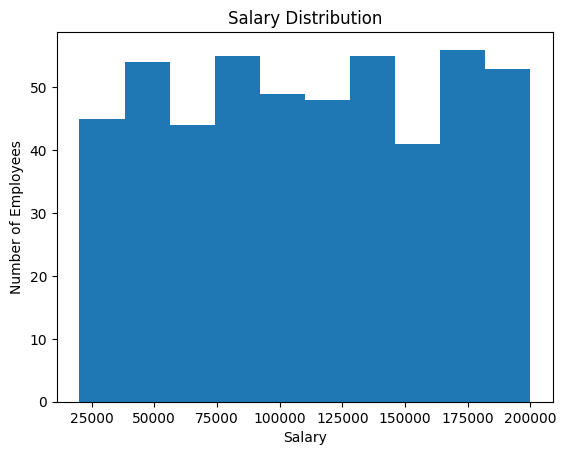

In [24]:
import matplotlib.pyplot as plt   #using matplotlib for visual exploration 


plt.hist(df["salary"])   # histogram
plt.title("Salary Distribution")   #---> title of the graph
plt.xlabel("Salary")   #---> x-axis label
plt.ylabel("Number of Employees")   #---> y-axis label
plt.show()



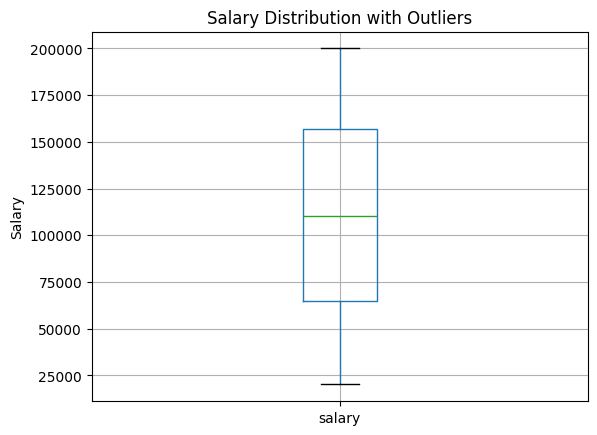

In [ ]:
# For the box plot of the data 
df.boxplot(column="salary")  
plt.title("Salary Distribution with Outliers")  #---> title of the plot 
plt.ylabel("Salary")
plt.show()


## Insights :


Employees with more experience usually earn higher salaries, but a few very high salaries affect the overall average.
- **Risk:** These very high salaries can change the results if not checked carefully.
- **Next step:** Review the high salary values and decide how to handle them before moving forward.


## Summary (Day 7)

- Explored dataset structure and distributions
- Analyzed categorical and numerical frequencies
- Studied relationships between variables
- Identified potential outliers
- Used basic visualizations to support insights
- Developed data-driven observations
